In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

#1. NẠP DỮ LIỆU

In [ ]:
DATA_PATH = '/home/content/drive/MyDrive/Workspace/VPBank_Hackathon/src/Data'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
crm_call_center_file = "CRM Call Center Logs.csv"
crm_events_file = "CRM Events.csv"
crm_review_file = "CRM Reviews.csv"
luxury_loan_portfolio_file = "LuxuryLoanPortfolio.csv"
completed_acct_file = "completedacct.csv"
completed_card_file = "completedcard.csv"
completed_client_file = "completedclient.csv"
completed_disposition_file = "completeddisposition.csv"
completed_loan_file = "completedloan.csv"
completed_district_file = "completeddistrict.csv"
completed_order_file = "completedorder.csv"
completed_trans_file = "completedtrans.csv"

In [ ]:
crm_call_center_df = pd.read_csv(os.path.join(DATA_PATH, crm_call_center_file))
crm_events_df = pd.read_csv(os.path.join(DATA_PATH, crm_events_file))
crm_users_df = pd.read_csv(os.path.join(DATA_PATH, crm_review_file),  encoding='unicode_escape')
luxury_loan_portfolio_df = pd.read_csv(os.path.join(DATA_PATH, luxury_loan_portfolio_file))
completed_acct_df = pd.read_csv(os.path.join(DATA_PATH, completed_acct_file))
completed_card_df = pd.read_csv(os.path.join(DATA_PATH, completed_card_file))
completed_client_df = pd.read_csv(os.path.join(DATA_PATH, completed_client_file))
completed_disposition_df = pd.read_csv(os.path.join(DATA_PATH, completed_disposition_file))
completed_loan_df = pd.read_csv(os.path.join(DATA_PATH, completed_loan_file))
completed_district_df = pd.read_csv(os.path.join(DATA_PATH, completed_district_file))
completed_order_df = pd.read_csv(os.path.join(DATA_PATH, completed_order_file))
completed_trans_df = pd.read_csv(os.path.join(DATA_PATH, completed_trans_file))

<ipython-input-27-1122a20be28d>:12: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  completed_trans_df = pd.read_csv(os.path.join(DATA_PATH, completed_trans_file))


#2. MÔ TẢ CÁC BẢNG

In [ ]:
def describe_df(df):
  print('information of dataframe')
  print(df.info())
  print('describe of dataframe')
  print(df.describe())

In [ ]:
describe_df(crm_call_center_df)

information of dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date received  3999 non-null   object 
 1   Complaint ID   2504 non-null   object 
 2   rand client    2504 non-null   object 
 3   phonefinal     3999 non-null   object 
 4   vru+line       3015 non-null   object 
 5   call_id        3015 non-null   float64
 6   priority       3015 non-null   float64
 7   type           3015 non-null   object 
 8   outcome        3015 non-null   object 
 9   server         3015 non-null   object 
 10  ser_start      3999 non-null   object 
 11  ser_exit       3999 non-null   object 
 12  ser_time       3999 non-null   object 
dtypes: float64(2), object(11)
memory usage: 406.3+ KB
None
describe of dataframe
            call_id     priority
count   3015.000000  3015.000000
mean   35110.222222     0.740962
std     3962.267289     0.8

In [ ]:
describe_df(completed_acct_df)

information of dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   account_id   4500 non-null   object
 1   district_id  4500 non-null   int64 
 2   frequency    4500 non-null   object
 3   parseddate   4500 non-null   object
 4   year         4500 non-null   int64 
 5   month        4500 non-null   int64 
 6   day          4500 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 246.2+ KB
None
describe of dataframe
       district_id         year        month          day
count  4500.000000  4500.000000  4500.000000  4500.000000
mean     37.310444  2015.098222     6.573556    15.030889
std      25.177217     1.483898     3.416507     8.443985
min       1.000000  2013.000000     1.000000     1.000000
25%      13.000000  2013.000000     4.000000     8.000000
50%      38.000000  2016.000000     7.000000    15.000000
75%      60.000

In [ ]:
describe_df(completed_disposition_df)

information of dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   disp_id     5369 non-null   object
 1   client_id   5369 non-null   object
 2   account_id  5369 non-null   object
 3   type        5369 non-null   object
dtypes: object(4)
memory usage: 167.9+ KB
None
describe of dataframe
          disp_id  client_id account_id   type
count        5369       5369       5369   5369
unique       5369       5369       4500      2
top     D00000001  C00000001  A00002369  Owner
freq            1          1          2   4500


# 2.1. Dữ liệu định danh khách hàng

In [ ]:
#head 10 records
completed_client_df.head(10)

,client_id,sex,fulldate,day,month,year,age,social,first,middle,last,phone,email,address_1,address_2,city,state,zipcode,district_id
0,C00000001,Female,1990-12-13,13,12,1990,29,926-93-2157,Emma,Avaya,Smith,367-171-6840,emma.smith@gmail.com,387 Wellington Ave.,Unit 1,Albuquerque,NM,47246,18
1,C00000002,Male,1965-02-04,4,2,1965,54,806-94-5725,Noah,Everest,Thompson,212-423-7734,noah.thompson@gmail.com,75 W. Berkshire St.,NaN,New York City,NY,10040,1
2,C00000003,Female,1960-10-09,9,10,1960,59,614-70-9100,Olivia,Brooklynne,Johnson,212-425-6932,olivia.johnson@outlook.com,36 Second St.,NaN,New York City,NY,10162,1
3,C00000004,Male,1976-12-01,1,12,1976,43,580-20-3414,Liam,Irvin,White,951-567-8925,liam.white@gmail.com,7607 Sunnyslope Street,NaN,Indianapolis,IN,49047,5
4,C00000005,Female,1980-07-03,3,7,1980,39,536-14-5809,Sophia,Danae,Williams,428-265-1568,sophia.williams@gmail.com,755 Galvin Street,NaN,Indianapolis,IN,40852,5
5,C00000006,Male,1939-09-22,22,9,1939,80,430-17-5825,Mason,Javen,Lopez,813-629-5038,mason.lopez7@gmail.com,8266 Arnold Drive,Unit 6,Portland,OR,44987,12
6,C00000007,Male,1949-01-25,25,1,1949,71,305-80-4254,Jacob,Khai,Lee,836-845-8120,jacob.lee7@gmail.com,827 N. Green Lake Court,NaN,Louisville,KY,44359,15
7,C00000008,Female,1958-02-21,21,2,1958,61,425-96-6358,Ava,Eliora,Brown,413-444-9280,ava.brown8@gmail.com,817 Joy Ridge Dr.,NaN,Springfield,MA,1101,51
8,C00000009,Male,1955-10-16,16,10,1955,64,832-31-7252,William,Marek,Gonzalez,781-995-6192,william.marek.gonzalez@gmail.com,68 Carriage Road,NaN,Lynn,MA,1901,60
9,C00000010,Male,1963-05-01,1,5,1963,56,295-22-6122,Ethan,Veer,Harris,508-902-5510,ethan.harris9@gmail.com,754 Grandrose St.,NaN,New Bedford,MA,2740,57



## Mô tả các dữ liệu:
Hiện tại, bảng có 5369 bản ghi - tương đương 5369 user. Các thông tin bảng bao gồm:
+ client_id: Mã khách hàng
+ sex: giới tính
+ fulldate: ngày tháng năm sinh
+ day: ngày sinh
+ month: tháng sinh
+ year: năm sinh
+ age: tuổi
+ social:
+ first: tên
+ middle: tên đệm
+ last: họ
+ phone: số điện thoại
+ email: email:
+ address_1: địa chỉ 1
+ address_2: địa chỉ 2
+ city: thành phố của địa chỉ 1
+ state: bảng của địa chỉ 1
+ zipcode: mã code của địa chỉ 1
+ district_id: mã huyện của địa chỉ 1

In [ ]:
describe_df(completed_client_df)

information of dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   client_id    5369 non-null   object
 1   sex          5369 non-null   object
 2   fulldate     5369 non-null   object
 3   day          5369 non-null   int64 
 4   month        5369 non-null   int64 
 5   year         5369 non-null   int64 
 6   age          5369 non-null   int64 
 7   social       5369 non-null   object
 8   first        5369 non-null   object
 9   middle       5369 non-null   object
 10  last         5369 non-null   object
 11  phone        5369 non-null   object
 12  email        5369 non-null   object
 13  address_1    5369 non-null   object
 14  address_2    83 non-null     object
 15  city         5369 non-null   object
 16  state        5369 non-null   object
 17  zipcode      5369 non-null   int64 
 18  district_id  5369 non-null   int64 
dtypes:

Hầu hết các cột dữ liệu đều có đầy đủ bản ghi. Duy nhất có trường address_2 bị bỏ trống nhiều tỉ lệ null > 96%. Xem xét loại bỏ trường address_2.

Các trường dữ liệu có kiểu dữ liệu dạng số bao gồm: day, month, year, age, zipcode, district_id

Các trường còn lại đều là kiểu dữ liệu dạng ký tự.

In [ ]:
numerical_client_df_cols = ['day', 'month', 'year', 'age', 'zipcode', 'district_id']
categorical_client_df_cols = ['sex', 'first', 'middle', 'last', 'phone', 'email', 'address_1', 'state', 'city']

In [ ]:
def plot_histogram(data, title):

  sns.histplot(data=data)
  # displaying the title
  plt.title(title)
  plt.show()

def plot_bar_count(data,title):
  sns.countplot(x=data, palette = "Set2")
  plt.title(title)
  plt.show()

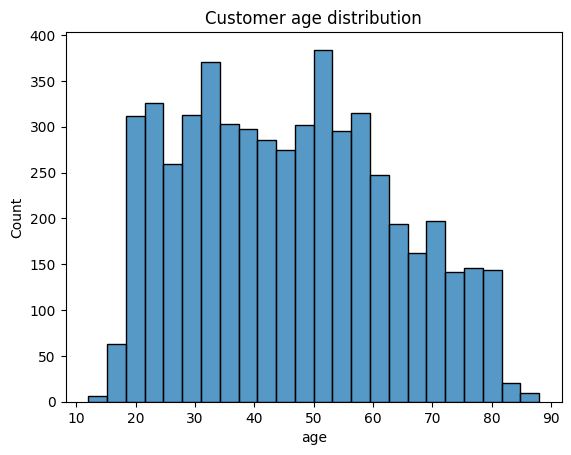

In [ ]:
plot_histogram(completed_client_df['age'], 'Customer age distribution')

Nhận xét:
  - Tuổi khách hàng phân bố khá đều từ 20 đến 80 tuổi
  - các phân bố ở 2 đầu là dưới 20 và trên 80 có sô lượng tỉ lệ so với các tuổi còn lại khá thấp. Điều này phù hợp với các giới hạn tuổi người dùng có thể sử dụng tài khoản ngân hàng

<ipython-input-35-4f5e56a25717>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data, palette = "Set2")


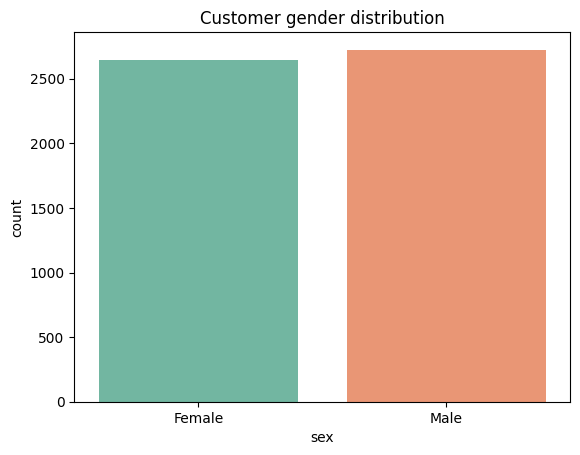

In [ ]:
plot_bar_count(completed_client_df['sex'], 'Customer gender distribution')

Nhận xét:
- Phân bố về giới tính của bộ dữ liệu là đồng đều

<ipython-input-35-4f5e56a25717>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data, palette = "Set2")


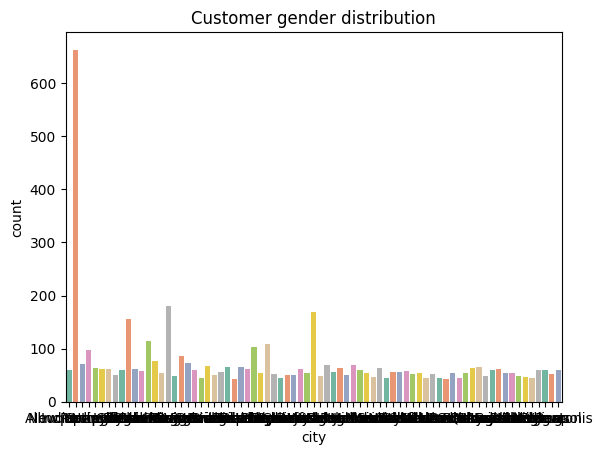

In [ ]:
plot_bar_count(completed_client_df['city'], 'Customer gender distribution')

# 2.2 Dữ liệu đơn hàng

In [ ]:
#head 10 records
completed_order_df.head(10)

,order_id,account_id,bank_to,account_to,amount,k_symbol
0,29401,A00000001,YZ,87144583,2452.0,Household Payment
1,29402,A00000002,ST,89597016,3372.7,Loan Payment
2,29403,A00000002,QR,13943797,7266.0,Household Payment
3,29404,A00000003,WX,83084338,1135.0,Household Payment
4,29405,A00000003,CD,24485939,327.0,
5,29406,A00000003,AB,59972357,3539.0,Insurance Payment
6,29407,A00000004,UV,26693541,2078.0,Household Payment
7,29408,A00000004,UV,5848086,1285.0,Household Payment
8,29409,A00000005,GH,37390208,2668.0,Household Payment
9,29410,A00000006,AB,44486999,3954.0,Household Payment


Mô tả: Dữ liệu đơn hàng (thanh toán dịch vụ qua app/web)
Size: 6742 bản ghi - 6742 giao dịch thanh toán

*  order_id,29401,Mã đơn hàng
*  account_id,A00000001,Mã khách hàng
*  bank_to,YZ,Ngân hàng đến
*  account_to,87144583,Tài khoản đến
*  amount,2452,Số tiền
*  k_symbol,Household Payment,"Mã ký hiệu xác định loại giao dịch (Trả tiền nhà, điện nước...)



In [ ]:
describe_df(completed_order_df)

information of dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6471 entries, 0 to 6470
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_id    6471 non-null   int64  
 1   account_id  6471 non-null   object 
 2   bank_to     6471 non-null   object 
 3   account_to  6471 non-null   int64  
 4   amount      6471 non-null   float64
 5   k_symbol    6471 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 303.5+ KB
None
describe of dataframe
           order_id    account_to        amount
count   6471.000000  6.471000e+03   6471.000000
mean   33778.197497  4.939904e+07   3280.635698
std     3737.681949  2.888356e+07   2714.475335
min    29401.000000  3.990000e+02      1.000000
25%    31187.500000  2.415918e+07   1241.500000
50%    32988.000000  4.975606e+07   2596.000000
75%    34785.500000  7.400045e+07   4613.500000
max    46338.000000  9.999420e+07  14882.000000


*  Các cột dữ liệu đều có đầy đủ bản ghi
*   Các trường dữ liệu: acc_id, bank_to, amount ở dạng số. Các trường dữ liệu còn lại ở dạng object
*   Có 2 trường dữ liệu cần quan tâm là amount (số tiền giao dịch), và k_symbol (loại giao dịch thanh toán)








In [ ]:
numerical_client_df_cols = ['order_id', 'account_to','amount']
categorical_client_df_cols = ['bank_to','k_symbol']

In [ ]:
def plot_histogram(data, title):

  sns.histplot(data=data)
  # displaying the title
  plt.title(title)
  plt.show()

def plot_bar_count(data,title):
  sns.countplot(x=data, palette = "Set3")
  plt.title(title)
  plt.show()

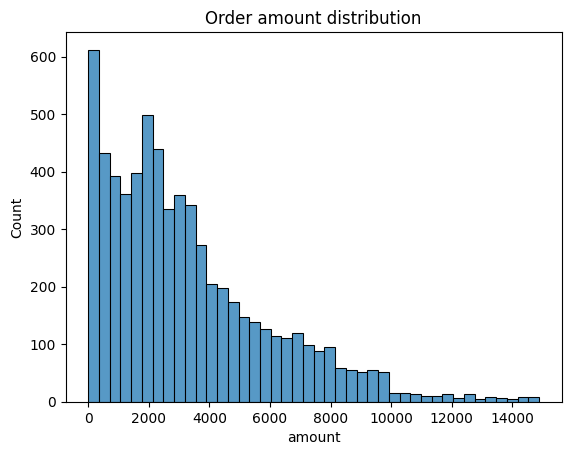

In [ ]:
plot_histogram(completed_order_df['amount'], 'Order amount distribution')



*   Nhận xét: Số tiền giao dịch trải dài từ 0-14000 đô và đa phần tập trung ở khoảng 0 - 2000 đôt



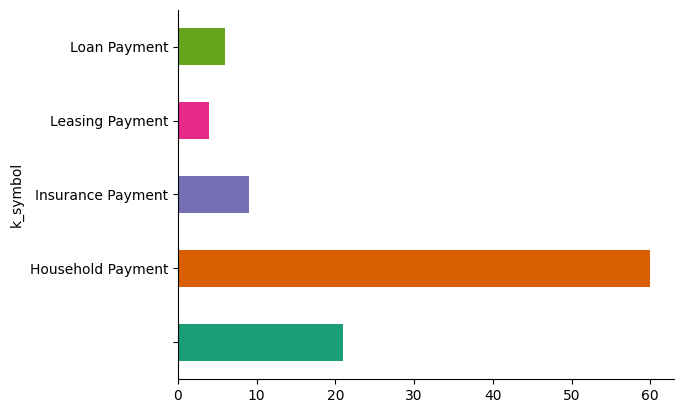

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('k_symbol').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)



*   60% là giao dịch thanh toán tiền nhà, các dịch vụ khác như thanh toán nợ, thanh toán bảo hiểm, thanh toán tiền thuê trung bình chiếm từ 10-15%



# 2.3 Dữ liệu giao dịch

In [ ]:
completed_trans_df.head(10)

,column_a,trans_id,account_id,type,operation,amount,balance,k_symbol,bank,account,year,month,day,fulldate,fulltime,fulldatewithtime,date
0,1,T00695247,A00002378,Credit,Credit in Cash,700.0,700.0,NaN,NaN,NaN,2013,1,1,2013-01-01,11:02:40,2013-01-01T11:02:40,2013-01-01
1,2,T00171812,A00000576,Credit,Credit in Cash,900.0,900.0,NaN,NaN,NaN,2013,1,1,2013-01-01,08:23:33,2013-01-01T08:23:33,2013-01-01
2,3,T00207264,A00000704,Credit,Credit in Cash,1000.0,1000.0,NaN,NaN,NaN,2013,1,1,2013-01-01,15:19:21,2013-01-01T15:19:21,2013-01-01
3,4,T01117247,A00003818,Credit,Credit in Cash,600.0,600.0,NaN,NaN,NaN,2013,1,1,2013-01-01,10:42:35,2013-01-01T10:42:35,2013-01-01
4,5,T00579373,A00001972,Credit,Credit in Cash,400.0,400.0,NaN,NaN,NaN,2013,1,2,2013-01-02,11:39:25,2013-01-02T11:39:25,2013-01-02
5,6,T00771035,A00002632,Credit,Credit in Cash,1100.0,1100.0,NaN,NaN,NaN,2013,1,2,2013-01-02,15:15:12,2013-01-02T15:15:12,2013-01-02
6,7,T00452728,A00001539,Credit,Credit in Cash,600.0,600.0,NaN,NaN,NaN,2013,1,3,2013-01-03,09:34:29,2013-01-03T09:34:29,2013-01-03
7,8,T00725751,A00002484,Credit,Credit in Cash,1100.0,1100.0,NaN,NaN,NaN,2013,1,3,2013-01-03,09:36:35,2013-01-03T09:36:35,2013-01-03
8,9,T00497211,A00001695,Credit,Credit in Cash,200.0,200.0,NaN,NaN,NaN,2013,1,3,2013-01-03,15:22:23,2013-01-03T15:22:23,2013-01-03
9,10,T00232960,A00000793,Credit,Credit in Cash,800.0,800.0,NaN,NaN,NaN,2013,1,3,2013-01-03,15:08:16,2013-01-03T15:08:16,2013-01-03



*  trans_id,T00695247,Mã giao dịch
*  account_id,A00002378,Mã tài khoản
*  type,Credit,Loại giao dịch
*  operation,Credit in Cash,Loại hoạt động (Credit in Cash: Ghi có bằng tiền mặt)
*  amount,700, Số tiền giao dịch
*  balance,700,Số dư sau giao dịch
*  k_symbol,,Ký hiệu giao dịch
*  bank,NA,Ngân hàng
*  year,2013,Năm (cập nhật)
*  month,1,Tháng (Cập nhật)
*  day,1,Ngày (Cập nhật)
*  fulldate,1/1/2013,Ngày cập nhật
*  fulltime,11:02:40,Giờ cập nhật
*  fulldatewith,time   2013-01-01T11:02:40,Thời gian cập nhật



In [ ]:
describe_df(completed_trans_df)

information of dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056320 entries, 0 to 1056319
Data columns (total 17 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   column_a          1056320 non-null  int64  
 1   trans_id          1056320 non-null  object 
 2   account_id        1056320 non-null  object 
 3   type              1056320 non-null  object 
 4   operation         873206 non-null   object 
 5   amount            1056320 non-null  float64
 6   balance           1056320 non-null  float64
 7   k_symbol          574439 non-null   object 
 8   bank              273508 non-null   object 
 9   account           295389 non-null   float64
 10  year              1056320 non-null  int64  
 11  month             1056320 non-null  int64  
 12  day               1056320 non-null  int64  
 13  fulldate          1056320 non-null  object 
 14  fulltime          1056320 non-null  object 
 15  fulldatewithtime  105632